<a href="https://colab.research.google.com/github/oggyu/MachineLearning/blob/master/ClassifyingMnistClothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.4MB 2.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import Fashion MNIST dataset 

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete747683/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete747683/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
print(dataset)
print(metadata)

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollg

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
               
num_train_examples = metadata.splits['train'].num_examples       
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))   

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [ ]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


In [7]:

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

# test plotting 2 and 25 images 

In [ ]:
for image, label in test_dataset.take(2):
  image = image.numpy().reshape((28,28))
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
 

# 25 imagest test subplot 
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

 building the nerual network model 
 Input flatten 784  
 hidden layer with 128 relu activation  
 final output layer with 10 sofmax activation 

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28,1)),
  tf.keras.layers.Dense(128, activation= tf.nn.relu),
  tf.keras.layers.Dense(10, activation= tf.nn.softmax)                            
])


# compile the model

In [10]:
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset,epochs =5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.3512 - accuracy: 0.6842
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7283 - accuracy: 0.7437
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5837 - accuracy: 0.8044
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5583 - accuracy: 0.8111
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5270 - accuracy: 0.8230


# Check accuracy in train and test model

In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.5624 - accuracy: 0.8116
Accuracy on test dataset: 0.8116000294685364


try prediction 

In [13]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  print(predictions.shape)
  print(predictions[0])
  print(np.argmax(predictions[0]))
  print(test_labels[0])
 

(32, 10)
[1.6670038e-04 1.6157632e-04 1.0877843e-01 2.4396880e-02 7.9582369e-01
 4.8091957e-09 6.8570115e-02 1.6214718e-15 2.1025718e-03 2.2385629e-12]
4
4


In [14]:
def plot_image(i,predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array , true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color= "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

                     

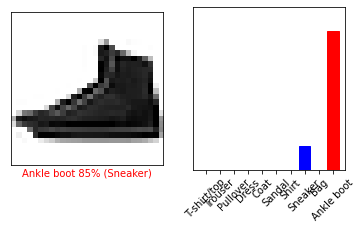

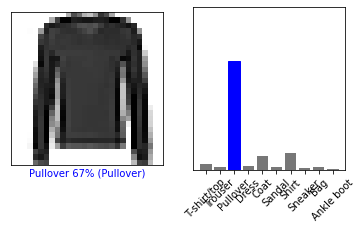

In [15]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

[[3.1327652e-33 3.6509923e-27 0.0000000e+00 4.1660521e-34 0.0000000e+00
  2.2406806e-03 0.0000000e+00 1.4515747e-01 6.2953476e-11 8.5260183e-01]]
9


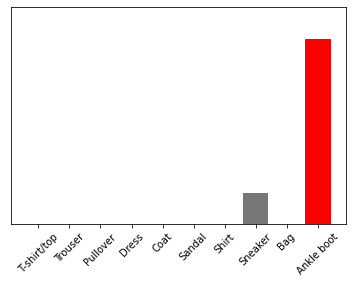

In [16]:
img = test_images[3]
img = np.array([img])
single_prediction = model.predict(img)
print(single_prediction)
print(np.argmax(single_prediction[0]))

plot_value_array(0,single_prediction, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Additional exercise 결과
1 . set training epochs set to 1 

    => before it was 0.34 and 88 percent accuracy 
    => accuracy 87 and loss is 0.3 

2 . hidden layer neurons try 10 and also 512 

    => training acuuracty was over 90% but when hidden neurons reduced to 15 from 128 accuracy when near 80%
    => also test accuracy reduced to 80% which was originally 88% 
    => increase to 500 didn't make prediction better train accuracy became 88% which was 90% when 128 


3 . don't normalize and see what happens 

    => accuracy decreased significantly 


이번에 배운 내용 중 기억할 것 
![대체 텍스트](https://)